['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
Accuracy of Decision Tree: 0.95
[0.         0.         0.41522903 0.58477097]


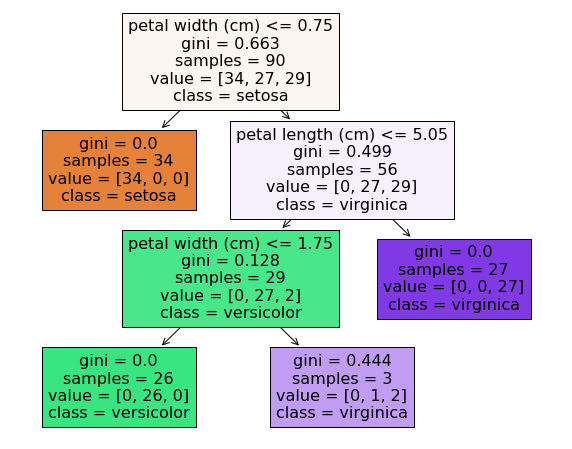

Accuracy of Gaussian: 0.9333333333333333
Accuracy of Logistic Regression: 0.9166666666666666
Accuracy of KNN: 0.9166666666666666
Predicted target name: setosa


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_dataset = load_iris()
x = iris_dataset.data
y = iris_dataset.target
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])
print(iris_dataset['data'].shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.4)

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train, y_train)
pred_tree = tree.predict(x_test)
print("Accuracy of Decision Tree: " + str(accuracy_score(pred_tree, y_test)))
print(tree.feature_importances_)

plt.figure(figsize = (10,8))
plot_tree(tree, feature_names = iris_dataset['feature_names'], class_names = iris_dataset['target_names'], filled = True)
plt.show()

gaus = GaussianNB()
gaus.fit(x_train, y_train)
pred_gaus = gaus.predict(x_test)
print("Accuracy of Gaussian: " + str(accuracy_score(y_test,pred_gaus)))

logres = LogisticRegression()
logres.fit(x_train, y_train)
pred_log = logres.predict(x_test)
print("Accuracy of Logistic Regression: " + str(accuracy_score(y_test,pred_log)))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print("Accuracy of KNN: " + str(accuracy_score(y_test,pred_knn)))

x_new = np.array([[4, 1.2, 2, 0.5]])
prediction = knn.predict(x_new)
print("Predicted target name: " + str(iris_dataset['target_names'][prediction][0]))

In [2]:
# Credits to "Speech Emotion Recognition with librosa" tutorial by data-flair
# this code is not mine, but is from a tutorial I followed.

import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

def load_data(test_size=0.3):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\PIYUSH\\Desktop\\ML_Deep_Dive\\ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

x_train,x_test,y_train,y_test=load_data(test_size=0.3)
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


(537, 231)
Features extracted: 180
Accuracy: 39.83%



Hi there! Do you want to talk or type to me? (Ta = Talk, Ty = Type, Ex = Exit)
ta


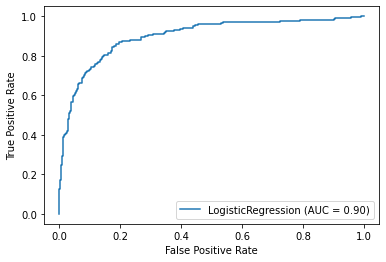

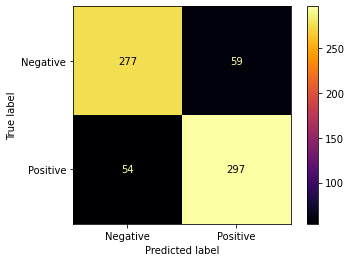

Accuracy of Logistic Regression: 0.836


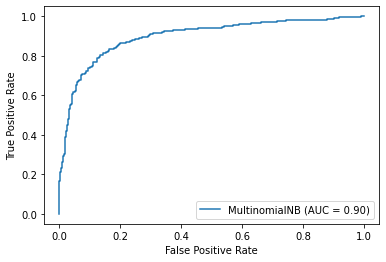

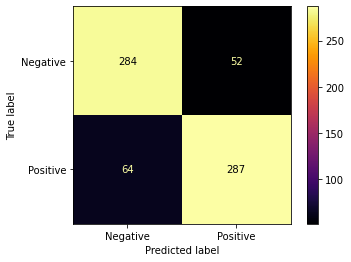

Accuracy of Multinomial Naive-Bayes: 0.831
Tell me how you feel today.
You said: dad

There is a 54.74% probability that it is NEGATIVE
Sentiment: Negative
I'm sorry about your day. Why dont we do a 90 second relaxation exercise to calm down? (Yes or No)
Sorry, I didn't quite get that. Could you say it again?

You said: yes

In order to get the most out of this experience, please put away any distractions and turn on the volume.
Are you ready? (Yes or No)
You said: yes
relax...

...think happy thoughts...

...everything is ok...

...you have 0 notifications to read...

...emails can wait...

...calm your mind...

...stretch...

...there is nothing that cannot wait...

...smile :)

...take a big, deep breathe...



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import speech_recognition as sr
import time
from playsound import playsound
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, auc, roc_auc_score

vect = CountVectorizer()
logres, nb = LogisticRegression(), MultinomialNB()

def check_mic(recognizer, mic):
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")
    if not isinstance(mic, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    with mic as source:
        recognizer.adjust_for_ambient_noise(source)
        msg = recognizer.listen(source)
    response = {"success": True, "error": None, "transcription": None}

    try:
        response["transcription"] = recognizer.recognize_google(msg)
    except sr.RequestError:
        response["success"] = False
        response["error"] = "API unavailable"
    except sr.UnknownValueError:
        response["error"] = "Unable to recognize speech"

    return response

def ask_user():
    while True:
        ans = input("\nHi there! Do you want to talk or type to me? (Ta = Talk, Ty = Type, Ex = Exit)\n")
        ans = ans.strip().lower()
        if ans == "ta":
            log_accuracy, nb_accuracy = train()
            talk(log_accuracy, nb_accuracy)
        elif ans == "ty":
            log_accuracy, nb_accuracy = train()
            types(log_accuracy, nb_accuracy)
        elif ans == "ex":
            print("Alright then, see you again soon!")
            exit()
        else:
            print("Sorry, I didn't quite get that. Please try again!")

def train():
    file_name = {'yelp': 'C:\\Users\\PIYUSH\\Desktop\\ML_Deep_Dive\\sentiment labelled sentences\\yelp_labelled.txt',
            'amazon': 'C:\\Users\\PIYUSH\\Desktop\\ML_Deep_Dive\\sentiment labelled sentences\\amazon_cells_labelled.txt',
            'imdb': 'C:\\Users\\PIYUSH\\Desktop\\ML_Deep_Dive\\sentiment labelled sentences\\imdb_labelled.txt'}

    df_list = []
    for source, filedir in file_name.items():
        df = pd.read_csv(filedir, names=['sentence','sentiment'],sep='\t')
        df['sentiment'] = df['sentiment'].replace([0,1],['Negative','Positive'])
        df_list.append(df)
    df = pd.concat(df_list)
    sentences = df['sentence'].values
    sentiment = df['sentiment'].values

    z_train, z_test, y_train, y_test = train_test_split(sentences, sentiment, test_size=0.25)
    vect.fit(z_train)

    x_train = vect.transform(z_train)
    x_test = vect.transform(z_test)

    logres.fit(x_train, y_train)
    log_accuracy = logres.score(x_test, y_test)
    plot_roc_curve(logres, x_test, y_test)
    plot_confusion_matrix(logres, x_test, y_test,cmap='inferno')
    plt.show()
    print("Accuracy of Logistic Regression: " + str(round(log_accuracy,3)))

    nb.fit(x_train, y_train)
    nb_accuracy = nb.score(x_test, y_test)
    plot_roc_curve(nb, x_test, y_test)
    plot_confusion_matrix(nb, x_test, y_test,cmap='inferno')
    plt.show()
    print("Accuracy of Multinomial Naive-Bayes: " + str(round(nb_accuracy,3)))

    return log_accuracy, nb_accuracy

def types(log_accuracy, nb_accuracy):
    user_input = input("\nHow are you feeling today? Tell me all about it.\n")
    ans = vect.transform([user_input])
    feels = sentiment(log_accuracy, nb_accuracy, ans)

    if feels == "Negative":
        user_type()
    else:
        print("That's great! I hope you keep up this energy!")
    exit()

def answer():
    tries = 5
    recognizer = sr.Recognizer()
    mic = sr.Microphone()
    for i in range(tries):
        guess = check_mic(recognizer, mic)
        if guess["transcription"]:
            break
        if not guess["success"]:
            break
        print("Sorry, I didn't quite get that. Could you say it again?\n")

    if guess["error"]:
        print("ERROR: {}".format(guess["error"]))
        exit()

    print("You said: {}".format(guess["transcription"]))
    return guess["transcription"]

def talk(log_accuracy, nb_accuracy):
    print('Tell me how you feel today.')
    recorded_ans = answer()

    ans = vect.transform([recorded_ans])
    feels = sentiment(log_accuracy, nb_accuracy, ans)

    if feels == "Negative":
        user_talk()
    else:
        print("That's great! I hope you keep up this energy!")
    exit()

def sentiment(log_accuracy, nb_accuracy, ans):
    best_acc = max(log_accuracy, nb_accuracy)
    if best_acc == log_accuracy:
        prediction = logres.predict(ans)
        prediction_prob = logres.predict_proba(ans)
    else:
        prediction = nb.predict(ans)
        prediction_prob = nb.predict_proba(ans)

    if prediction_prob[0][0] > prediction_prob[0][1]:
        print("\nThere is a " + str(round(prediction_prob[0][0]*100, 2)) + "% probability that it is NEGATIVE")
    else:
        print("\nThere is a " + str(round(prediction_prob[0][1]*100, 2)) + "% probability that it is POSITIVE")

    print("Sentiment: " + str(prediction[0]))

    return prediction[0]

def user_type():
    while True:
        reply = input("I'm sorry about your day. Why dont we do a 90 second relaxation exercise to calm down? (Y/N)\n")
        if reply.strip().lower() == "y":
            print("\nIn order to get the most out of this experience, please put away any distractions and turn on the volume.")
            time.sleep(0.2)
            while True:
                start = input("Squeeze enter to start\n")
                if start == "":
                    negative_feels()
                else:
                    trys = input("I'm sorry do you want to try again? (Y/N)\n")
                    if trys.strip().lower() == "y":
                        continue
                    elif trys.strip().lower() == "n":
                        print("Alright then. I hope you feel better soon. Goodbye")
                        exit()
                    else: print("I'm really sorry but please try again")
        elif reply.strip().lower() == "n":
            print("Alright then. I hope you feel better soon. Goodbye")
            exit()
        else:
            print("I'm really sorry but please try again")

def user_talk():
    while True:
        print("I'm sorry about your day. Why dont we do a 90 second relaxation exercise to calm down? (Yes or No)")
        yn_ans = answer()
        if yn_ans == "yes":
            print("\nIn order to get the most out of this experience, please put away any distractions and turn on the volume.")
            time.sleep(1)
            while True:
                print("Are you ready? (Yes or No)")
                ready = answer()
                if ready == "yes":
                    negative_feels()
                else:
                    print("I'm sorry do you want to try again? (Yes or No)")
                    ready = answer()
                    if ready == "y":
                        continue
                    elif ready == "n":
                        print("Alright then. I hope you feel better soon. Goodbye")
                        exit()
                    else: print("I'm really sorry but please try again")
        elif yn_ans == "no":
            print("Alright then. I hope you feel better soon. Goodbye")
            exit()
        else:
            print("I'm really sorry but please try again")

def negative_feels():
    kalm_words = ["relax...", "...think happy thoughts...", "...everything is ok...", "...you have 0 notifications to read...",
    "...emails can wait...", "...calm your mind...", "...stretch...", "...there is nothing that cannot wait...", "...smile :)",
    "...take a big, deep breathe...", "...now exhale...", "...feel all the tension dissipate...", "...rest your eyes for 10 seconds..."]
    playsound('C:\\Users\\PIYUSH\\Desktop\\ML_Deep_Dive\\Quiet_Time.mp3', False)
    for i in kalm_words:
        print(i + "\n")
        time.sleep(5)
    time.sleep(10)
    print("I hope you feel better now. Take this time to relax some more.")
    time.sleep(20)
    while True:
        leave = input("Ready to leave? Squeeze enter again")
        if leave == "":
            print("Goodbye!")
            exit()
        else:
            continue

ask_user()
